# Austin Wayling

## Research question/interests

I have always loved following sports and stats and my favorite is baseball. The movie Moneyball introduced me to the idea of a team using data analysis to compete despite having a substantially smaller budget. Since then players have approached the game through a different lense causing the way the game is played to change. I am interested in looking into trends throughout the 150 year history of baseball and if the current declining offense is a cause for concern or not.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.__version__

In [ ]:
batting = pd.read_csv("../data/raw/Batting.csv")

In [ ]:
batting

In [ ]:
people = pd.read_csv("../data/raw/People.csv")

In [ ]:
pitching = pd.read_csv("../data/raw/Pitching.csv")

In [ ]:
salaries = pd.read_csv("../data/raw/Salaries.csv")

In [ ]:
fielding = pd.read_csv("../data/raw/Fielding.csv")

# Milestone 3

## Task 1 EDA

In [ ]:
batting.shape

In [ ]:
people.shape

In [ ]:
pitching.shape

In [ ]:
fielding.shape

In [ ]:
people.describe()

In [ ]:
batting.describe()

In [ ]:
pitching.describe()

In [ ]:
salaries.describe()

In [ ]:
fielding.describe()

In [ ]:
batting.columns

In [ ]:
salaries.columns

In [ ]:
pitching.columns

In [ ]:
fielding.columns

In [ ]:
people.columns

In [ ]:
sns.set_theme(style="ticks",
              font_scale=1.3, 
             )
sns.displot(batting["AB"], kde = True, bins = 15)
#Lot's of unqualafied players who only had a few AB's

In [ ]:
salaries.isnull().describe()

In [ ]:
#Salaries start in 1985 and ends in 2016
batting_edit = batting.drop(batting[batting["yearID"] < 1985].index | batting[batting["yearID"] >2016].index)

In [ ]:
batting_edit["PA"] = batting_edit["AB"] + batting_edit["BB"] + batting_edit["HBP"] + batting_edit["SH"] + batting_edit["SF"]
batting_edit

In [ ]:
batgroup = batting_edit.groupby(["playerID", "yearID"])
batgroup.head()

In [ ]:
salgroup = salaries.groupby(["playerID", "yearID"])
salgroup.agg(np.size)[salgroup.agg(np.size)["teamID"] > 1]

In [ ]:
salaries.shape

In [ ]:
batting = batting.fillna(0)
#Values from pre 1911 and othr early seasons
#Likely very little change from an accurate value

In [ ]:
batting["PA"] = batting["AB"] + batting["BB"] + batting["HBP"] + batting["SH"] + batting["SF"]
batting

In [ ]:
bat_total = batting.groupby("playerID").sum()
bat_total

In [ ]:
batting["PA"].describe()

In [ ]:
bat_total["G"].describe()

In [ ]:
bat_total["debut"] = batting.groupby("playerID")["yearID"].min()
bat_total["seasons"] = 1 + batting.groupby("playerID")["yearID"].max() - batting.groupby("playerID")["yearID"].min()
bat_total

In [ ]:
#A qualafied hitter must have 3.1 PA's per team game played. I have determined team games played based on the length of their debut season.
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (70 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] < 1884].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (112 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1890) & (bat_total["debut"] >= 1884)].index)
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (132 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1903) & (bat_total["debut"] >= 1890)].index)    
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (154 * bat_total["seasons"])) < 3.1].index & bat_total[(bat_total["debut"] < 1961) & (bat_total["debut"] >= 1903)].index)  
bat_total = bat_total.drop(bat_total[(bat_total["PA"] / (162 * bat_total["seasons"])) < 3.1].index & bat_total[bat_total["debut"] >= 1961].index)                     

In [ ]:
bat_total.describe()  

In [ ]:
bat_total = bat_total.drop(["yearID", "stint"], axis = 1)

In [ ]:
bat_total.describe()

In [ ]:
bat_total.shape

In [ ]:
sns.scatterplot(data = bat_total, x = "debut", y = "SO")
#Notice how K's increase over time as modern players are less concerned with strikeouts than before and games increased

In [ ]:
bat_total.columns

In [ ]:
bat_total["BA"] = bat_total["H"] / bat_total["AB"]
bat_total["OBP"] = (bat_total["H"] + bat_total["BB"] + bat_total["HBP"])/bat_total["PA"]
bat_total["SLG"] = ((bat_total["H"] - bat_total["2B"] - bat_total["3B"] - bat_total["HR"]) + (2 * bat_total["2B"]) + (3 * bat_total["3B"]) + (4 * bat_total["HR"]))
bat_total["OPS"] = bat_total["OBP"] + bat_total["SLG"]
#Rate stats> OPS is considered to be the best for evaluating perfomance, however advanced stats like OPS+ or wRC+ can be a better measure.

In [ ]:
bat_tot2 = bat_total.drop(["IBB", "HBP", "SH", "SF", "GIDP", "seasons", "AB"], axis = 1)

In [ ]:
#sns.pairplot(bat_tot2)

In [ ]:
batcorr = bat_total.corr()

In [ ]:
sns.scatterplot(data = bat_total, x = "SB", y = "CS")

In [ ]:
bat_year = batting.groupby("yearID").sum()
bat_year

In [ ]:
bat_year["BA"] = bat_year["H"] / bat_year["AB"]
bat_year["OBP"] = (bat_year["H"] + bat_year["BB"] + bat_year["HBP"])/bat_year["PA"]
bat_year["SLG"] = ((bat_year["H"] - bat_year["2B"] - bat_year["3B"] - bat_year["HR"]) + (2 * bat_year["2B"]) + (3 * bat_year["3B"]) + (4 * bat_year["HR"])) / bat_year["AB"]
bat_year["OPS"] = bat_year["OBP"] + bat_year["SLG"]
bat_year.describe()

In [ ]:
sns.scatterplot(data = bat_year, x = bat_year.index, y = "BA")
#Note drop after 1900, decline from mid 20's to 70's and decline since 2000.

In [ ]:
pitch_year = pitching.groupby("yearID").sum()
pitch_year.describe()

In [ ]:
pitch_year.columns

In [ ]:
pitch_year = pitch_year.drop(["stint", "BK", "GF", "SH", "SF", "GIDP"], axis = 1)

In [ ]:
pitch_year

In [ ]:
bat_year[:4]

In [ ]:
pitch_year[:4]

In [ ]:
pitch_year.drop(["BAOpp", "ERA"], axis = 1)

In [ ]:
era = (9 * pitch_year["ER"]) / (pitch_year["IPouts"] / 3)
era


In [ ]:
pitch_year["ERA"] = era

In [ ]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "ERA")
#ERA seems in sync with BA however it is not still in decline (rise of stats like OBP may be the cause?)

In [ ]:
sns.scatterplot(data = pitch_year, x = pitch_year.index, y = "CG")
#Complete games decreasing as pitcher usage changes

After exploring the data more I am interested in the trends throughout the history of baseball. The swings between offense and defense over the years is interesting and a current hot topic in baseball. The start of the 2021 season was compared to the deadball era due to historic offensive lows but the trends appear closer to other era's throughout baseball. I want to see if the reactions to declining offense in baseball is truly a cause for concern, or if the media is overexaggerating the problem.

## Task 2/3 Analysis Pipeline and Method Chaining

In [163]:
batting_clean = (
                pd.read_csv("../data/raw/Batting.csv")
                .fillna(0)
                .assign(
                    PA = lambda x: x["AB"] + x["BB"] + x["HBP"] + x["SH"] + x["SF"]
                )
)
batting_clean

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,1871,1,TRO,0,1,4,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,addybo01,1871,1,RC1,0,25,118,30,32,6,...,8.0,1.0,4,0.0,0.0,0.0,0.0,0.0,0.0,122.0
2,allisar01,1871,1,CL1,0,29,137,28,40,4,...,3.0,1.0,2,5.0,0.0,0.0,0.0,0.0,1.0,139.0
3,allisdo01,1871,1,WS3,0,27,133,28,44,10,...,1.0,1.0,0,2.0,0.0,0.0,0.0,0.0,0.0,133.0
4,ansonca01,1871,1,RC1,0,25,120,29,39,11,...,6.0,2.0,2,1.0,0.0,0.0,0.0,0.0,0.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
bat_clean_year = (
                batting_clean.groupby("yearID").sum()
                .drop(["stint", "SH", "SF", "G"], axis = 1)
                .assign(
                    BA = lambda x: x['H'] / x['AB'],
                    OBP = lambda x: (x['H'] + x['BB'] + x['HBP']) / x['PA'],
                    SLG = lambda x: ((x['H'] - x['2B'] - x['3B'] - x['HR']) + 2 * x['2B'] + 3 * x['3B'] + 4 * x['HR']) / x['AB'],
                    OPS = lambda x: x['OBP'] + x["SLG"]
                )
)
bat_clean_year

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP,PA,BA,OBP,SLG,OPS
yearID,,,,,,,,,,,,,,,,,,,
1871,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,74.0,11215.0,0.286546,0.311547,0.383848,0.695395
1872,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,265.0,0.0,0.0,97.0,15928.0,0.285158,0.296961,0.347846,0.644807
1873,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,122.0,17294.0,0.290465,0.304210,0.357273,0.661483
1874,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,107.0,19342.0,0.273451,0.282391,0.333229,0.615619
1875,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,142.0,27082.0,0.253867,0.260727,0.309954,0.570681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,3719.0,184539.0,0.255350,0.319797,0.417405,0.737202
2017,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,40104.0,970.0,1763.0,3804.0,185252.0,0.254972,0.322841,0.425912,0.748753
2018,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,3457.0,185098.0,0.247945,0.316730,0.409419,0.726148


In [165]:
def batting_load_and_process(file_path):
    batting_clean = (
                pd.read_csv(file_path)
                .fillna(0)
                .assign(
                    PA = lambda x: x["AB"] + x["BB"] + x["HBP"] + x["SH"] + x["SF"]
                )
        )
    bat_clean_year = (
                batting_clean.groupby("yearID").sum()
                .drop(["stint", "SH", "SF", "G"], axis = 1)
                .assign(
                    BA = lambda x: x['H'] / x['AB'],
                    OBP = lambda x: (x['H'] + x['BB'] + x['HBP']) / x['PA'],
                    SLG = lambda x: ((x['H'] - x['2B'] - x['3B'] - x['HR']) + 2 * x['2B'] + 3 * x['3B'] + 4 * x['HR']) / x['AB'],
                    OPS = lambda x: x['OBP'] + x["SLG"],
                    decade = lambda x: (x.index//10)*10
                )
        )
    return bat_clean_year

In [166]:
batting_load_and_process('../data/raw/Batting.csv')

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,GIDP,PA,BA,OBP,SLG,OPS,decade
yearID,,,,,,,,,,,,,,,,,,,,
1871,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,74.0,11215.0,0.286546,0.311547,0.383848,0.695395,1870
1872,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,265.0,0.0,0.0,97.0,15928.0,0.285158,0.296961,0.347846,0.644807,1870
1873,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,122.0,17294.0,0.290465,0.304210,0.357273,0.661483,1870
1874,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,107.0,19342.0,0.273451,0.282391,0.333229,0.615619,1870
1875,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,142.0,27082.0,0.253867,0.260727,0.309954,0.570681,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,3719.0,184539.0,0.255350,0.319797,0.417405,0.737202,2010
2017,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,40104.0,970.0,1763.0,3804.0,185252.0,0.254972,0.322841,0.425912,0.748753,2010
2018,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,41207.0,929.0,1922.0,3457.0,185098.0,0.247945,0.316730,0.409419,0.726148,2010


In [167]:
pitching_clean = (
                pd.read_csv('../data/raw/Pitching.csv')
                .fillna(0)
)
pitching_clean

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,0,1,2,3,3,2,...,0.0,7,0.0,0,146.0,0,42,0.0,0.0,0.0
1,brainas01,1871,1,WS3,0,12,15,30,30,30,...,0.0,7,0.0,0,1291.0,0,292,0.0,0.0,0.0
2,fergubo01,1871,1,NY2,0,0,0,1,0,0,...,0.0,2,0.0,0,14.0,0,9,0.0,0.0,0.0
3,fishech01,1871,1,RC1,0,4,16,24,24,22,...,0.0,20,0.0,0,1080.0,1,257,0.0,0.0,0.0
4,fleetfr01,1871,1,NY2,0,0,1,1,1,1,...,0.0,0,0.0,0,57.0,0,21,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48394,zeuchtj01,2020,1,TOR,AL,1,0,3,1,0,...,0.0,0,0.0,0,47.0,1,2,0.0,0.0,0.0
48395,zimmebr02,2020,1,BAL,AL,0,0,2,1,0,...,0.0,2,2.0,0,31.0,1,6,0.0,0.0,1.0
48396,zimmejo02,2020,1,DET,AL,0,0,3,2,0,...,0.0,0,0.0,0,28.0,0,6,0.0,0.0,1.0
48397,zimmeky01,2020,1,KCA,AL,1,0,16,1,0,...,0.0,2,1.0,0,91.0,4,4,0.0,0.0,3.0


In [184]:
pitch_clean_year = (
            pitching_clean.groupby('yearID').sum()
            .drop(["stint", "BK", "GF", "SH", "SF", "GIDP", "BAOpp", "ERA", "W", "L", "G", "GS", "BFP"], axis = 1)
            .assign(
                ERA = lambda x: (9 * x['ER']) / (x['IPouts'] / 3)
            )
)
pitch_clean_year

,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,IBB,WP,HBP,R,ERA
yearID,,,,,,,,,,,,,,
1871,231,4,4,6750,3101,1055,47,393,175,0.0,208,0.0,2659,4.220000
1872,327,10,7,9858,4467,1335,37,263,265,0.0,202,0.0,3390,3.656421
1873,362,8,9,10754,4926,1353,47,335,278,0.0,124,0.0,3580,3.396969
1874,439,15,3,12509,5224,1015,40,238,357,0.0,127,0.0,3470,2.190823
1875,621,49,18,18571,6812,1531,40,249,675,0.0,330,0.0,4234,2.225890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,83,36,1276,129919,42276,20160,5610,15088,38982,932.0,1808,1651.0,21744,4.189687
2017,59,27,1179,129771,42215,20947,6105,15829,40104,970.0,1810,1763.0,22582,4.358208
2018,42,19,1244,130467,41018,20051,5585,15686,41207,929.0,1847,1922.0,21630,4.149532


In [185]:
def pitching_load_and_process(file_path):
    pitching_clean = (
                pd.read_csv('../data/raw/Pitching.csv')
                .fillna(0)
        )
    pitch_clean_year = (
            pitching_clean.groupby('yearID').sum()
            .drop(["stint", "BK", "GF", "SH", "SF", "GIDP", "BAOpp", "ERA", "W", "L", "G", "GS", "BFP"], axis = 1)
            .assign(
                ERA = lambda x: (9 * x['ER']) / (x['IPouts'] / 3),
                KPG = lambda x: 9 * x['SO']/(x['IPouts']/3),
                BBPG = lambda x: 9 * x['BB']/(x['IPouts']/3)
            )
        )
    return pitch_clean_year

In [186]:
pitching_load_and_process('../data/raw/Pitching.csv')

,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,IBB,WP,HBP,R,ERA,KPG,BBPG
yearID,,,,,,,,,,,,,,,,
1871,231,4,4,6750,3101,1055,47,393,175,0.0,208,0.0,2659,4.220000,0.700000,1.572000
1872,327,10,7,9858,4467,1335,37,263,265,0.0,202,0.0,3390,3.656421,0.725806,0.720329
1873,362,8,9,10754,4926,1353,47,335,278,0.0,124,0.0,3580,3.396969,0.697973,0.841082
1874,439,15,3,12509,5224,1015,40,238,357,0.0,127,0.0,3470,2.190823,0.770565,0.513710
1875,621,49,18,18571,6812,1531,40,249,675,0.0,330,0.0,4234,2.225890,0.981369,0.362016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,83,36,1276,129919,42276,20160,5610,15088,38982,932.0,1808,1651.0,21744,4.189687,8.101309,3.135615
2017,59,27,1179,129771,42215,20947,6105,15829,40104,970.0,1810,1763.0,22582,4.358208,8.343991,3.293363
2018,42,19,1244,130467,41018,20051,5585,15686,41207,929.0,1847,1922.0,21630,4.149532,8.527743,3.246200


In [187]:
diff_cols = pitch_clean_year.columns.difference(bat_clean_year.columns)
data_clean = pd.merge(bat_clean_year, pitch_clean_year[diff_cols], on = ['yearID'])
data_clean

,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,...,OBP,SLG,OPS,CG,ER,ERA,IPouts,SHO,SV,WP
yearID,,,,,,,,,,,,,,,,,,,,,
1871,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,...,0.311547,0.383848,0.695395,231,1055,4.220000,6750,4,4,208
1872,15665,3390,4467,581,145,37,2132.0,269.0,134.0,263,...,0.296961,0.347846,0.644807,327,1335,3.656421,9858,10,7,202
1873,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,...,0.304210,0.357273,0.661483,362,1353,3.396969,10754,8,9,124
1874,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,...,0.282391,0.333229,0.615619,439,1015,2.190823,12509,15,3,127
1875,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,...,0.260727,0.309954,0.570681,621,1531,2.225890,18571,49,18,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,...,0.319797,0.417405,0.737202,83,20160,4.189687,129919,36,1276,1808
2017,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,15829,...,0.322841,0.425912,0.748753,59,20947,4.358208,129771,27,1179,1810
2018,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,15686,...,0.316730,0.409419,0.726148,42,20051,4.149532,130467,19,1244,1847


In [188]:
def merge_batting_pitching(bat, pitch):
    diff_cols = pitch.columns.difference(bat.columns)
    data_clean = (
        pd.merge(bat, pitch[diff_cols], on = ['yearID'])
        .assign(
            BABIP = lambda x: (x['H'] - x['HR']) / (x['AB']-x['SO']-x['HR']) 
        )
        .reset_index()
    )
    return data_clean

In [189]:
df1 = batting_load_and_process('../data/raw/Batting.csv')
df2 = pitching_load_and_process('../data/raw/Pitching.csv')
merge_batting_pitching(df1, df2)

,yearID,AB,R,H,2B,3B,HR,RBI,SB,CS,...,BBPG,CG,ER,ERA,IPouts,KPG,SHO,SV,WP,BABIP
0,1871,10822,2659,3101,434,239,47,1783.0,441.0,123.0,...,1.572000,231,1055,4.220000,6750,0.700000,4,4,208,0.288113
1,1872,15665,3390,4467,581,145,37,2132.0,269.0,134.0,...,0.720329,327,1335,3.656421,9858,0.725806,10,7,202,0.288355
2,1873,16959,3580,4926,570,211,47,2331.0,314.0,131.0,...,0.841082,362,1353,3.396969,10754,0.697973,8,9,124,0.293315
3,1874,19104,3470,5224,634,194,40,2252.0,242.0,97.0,...,0.513710,439,1015,2.190823,12509,0.770565,15,3,127,0.277116
4,1875,26833,4234,6812,839,273,40,2710.0,629.0,320.0,...,0.362016,621,1531,2.225890,18571,0.981369,49,18,330,0.259285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2016,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,...,3.135615,83,20160,4.189687,129919,8.101309,36,1276,1808,0.303102
146,2017,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,...,3.293363,59,20947,4.358208,129771,8.343991,27,1179,1810,0.302535
147,2018,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,...,3.246200,42,20051,4.149532,130467,8.527743,19,1244,1847,0.298660
148,2019,166651,23467,42039,8531,785,6776,22471.0,2280.0,832.0,...,3.294427,45,21738,4.505458,130270,8.875574,26,1180,1788,0.301259


In [196]:
data_clean = merge_batting_pitching(bat_clean_year, pitch_clean_year)
data_clean

,yearID,AB,R,H,2B,3B,HR,RBI,SB,CS,...,SLG,OPS,CG,ER,ERA,IPouts,SHO,SV,WP,BABIP
0,1871,10822,2659,3101,434,239,47,1783.0,441.0,123.0,...,0.383848,0.695395,231,1055,4.220000,6750,4,4,208,0.288113
1,1872,15665,3390,4467,581,145,37,2132.0,269.0,134.0,...,0.347846,0.644807,327,1335,3.656421,9858,10,7,202,0.288355
2,1873,16959,3580,4926,570,211,47,2331.0,314.0,131.0,...,0.357273,0.661483,362,1353,3.396969,10754,8,9,124,0.293315
3,1874,19104,3470,5224,634,194,40,2252.0,242.0,97.0,...,0.333229,0.615619,439,1015,2.190823,12509,15,3,127,0.277116
4,1875,26833,4234,6812,839,273,40,2710.0,629.0,320.0,...,0.309954,0.570681,621,1531,2.225890,18571,49,18,330,0.259285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2016,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,...,0.417405,0.737202,83,20160,4.189687,129919,36,1276,1808,0.303102
146,2017,165567,22582,42215,8397,795,6105,21558.0,2527.0,934.0,...,0.425912,0.748753,59,20947,4.358208,129771,27,1179,1810,0.302535
147,2018,165432,21630,41018,8264,847,5585,20606.0,2474.0,958.0,...,0.409419,0.726148,42,20051,4.149532,130467,19,1244,1847,0.298660
148,2019,166651,23467,42039,8531,785,6776,22471.0,2280.0,832.0,...,0.434849,0.756201,45,21738,4.505458,130270,26,1180,1788,0.301259


In [201]:
def norm_data(df):
   dfn=((df-df.min())/(df.max()-df.min()))*20 
   return dfn

In [192]:
data_clean_norm = norm_data(data_clean)
data_clean_norm

,yearID,AB,R,H,2B,3B,HR,RBI,SB,CS,...,SLG,OPS,CG,ER,ERA,IPouts,SHO,SV,WP,BABIP
0,0.000000,0.000000,0.654615,0.000000,0.006845,1.213840,0.071080,0.403499,1.283843,1.202346,...,11.935093,10.535460,1.414566,0.184891,12.939410,0.000000,0.000000,0.046476,0.815930,11.027797
1,0.134228,0.617096,1.288421,0.646995,0.342231,0.147476,0.041463,0.715051,0.783115,1.309873,...,6.487273,6.261944,2.086835,0.438664,9.345650,0.500443,0.348837,0.092951,0.757649,11.094960
2,0.268456,0.781978,1.453158,0.864396,0.317134,0.896200,0.071080,0.892698,0.914119,1.280547,...,7.913895,7.670694,2.331933,0.454978,7.691204,0.644715,0.232558,0.123935,0.000000,12.471836
3,0.402685,1.055294,1.357784,1.005542,0.463153,0.703347,0.050348,0.822175,0.704512,0.948192,...,4.275461,3.796267,2.871148,0.148638,0.000000,0.927301,0.639535,0.030984,0.029140,7.974734
4,0.536913,2.040125,2.020202,1.757685,0.930869,1.599546,0.050348,1.231030,1.831150,3.128055,...,0.753588,0.000000,4.145658,0.616305,0.223612,1.903389,2.616279,0.263362,2.000971,3.024752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,19.463087,19.716872,17.202064,18.554919,17.848506,8.406126,16.546720,17.330834,7.385735,9.784946,...,17.012960,14.067209,0.378151,17.500340,12.746117,19.832381,1.860465,19.752130,16.357455,15.188953
146,19.597315,19.717637,17.928643,18.526027,18.174766,7.521271,18.012735,18.056597,7.356623,9.130010,...,18.300247,15.043047,0.210084,18.213622,13.820717,19.808550,1.337209,18.249419,16.376882,15.031488
147,19.731544,19.700435,17.103221,17.959077,17.871321,8.111174,16.472679,17.206749,7.202329,9.364614,...,15.804512,13.133444,0.091036,17.401550,12.490059,19.920618,0.872093,19.256390,16.736280,13.955635
148,19.865772,19.855760,18.695973,18.442666,18.480493,7.407828,20.000000,18.871630,6.637555,8.132942,...,19.652541,15.672176,0.112045,18.930530,14.759683,19.888898,1.279070,18.264911,16.163186,14.677269


In [202]:
import projectfunctions1 as p1
bat = p1.batting_load_and_process('../data/raw/Batting.csv')
pitch = p1.pitching_load_and_process('../data/raw/Pitching.csv')
clean = p1.merge_batting_pitching(bat, pitch)
norm = p1.norm_data(clean)

AttributeError: module 'projectfunctions1' has no attribute 'norm_data'

<AxesSubplot:>

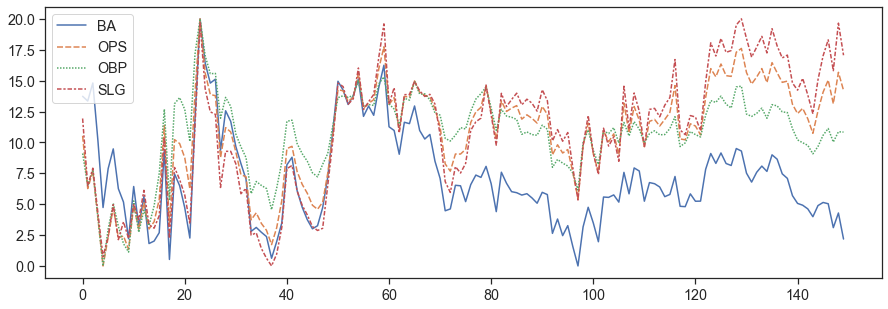

In [194]:
plt.figure(figsize = (15,5))
sns.lineplot(data = data_clean_norm[['BA', 'OPS', 'OBP', 'SLG']])

In [195]:
sns.lineplot(data = data_clean_nrom[['']])

NameError: name 'data_clean_nrom' is not defined